# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

After further reading about the problem I came up to the following:

For concrete mix design, the mandatory fields or components that are typically considered are:

    Cement (Component 1):
        The type and amount of cement are fundamental to the mix design.

    Water (Component 4):
        The water-cement ratio is a critical parameter affecting strength.

    Coarse Aggregate (Component 6):
        The type, size, and amount of coarse aggregate influence the mix.

    Fine Aggregate (Component 7):
        The type, gradation, and amount of fine aggregate are essential.

These components are considered fundamental and are typically required for a basic mix design. The water-cement ratio is particularly crucial for controlling strength and durability. Depending on specific project requirements, additional components such as superplasticizer, blast furnace slag, fly ash, and age might be considered for optimizing mix properties.

Mix design involves adjusting the proportions of these components to achieve the desired concrete properties, including compressive strength, workability, and durability.

In [4]:
# @title Imports
#from google.colab import drive
#drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'pandas'

In [ ]:
# @title Data Loading and Preparation
df = pd.read_excel('/content/drive/MyDrive/Colab Data/Concrete_Data.xlsx')
df.columns = ['cement','blast','flyash','water','superplasticizer','coarseagg','fineagg','age','strength']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(10)

,cement,blast,flyash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [ ]:
df.duplicated().sum()
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.info()
#No nulls in data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   blast             1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseagg         1005 non-null   float64
 6   fineagg           1005 non-null   float64
 7   age               1005 non-null   int64  
 8   strength          1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [ ]:
#checking mandatory components for zeros
(df['cement'] == 0).sum(),(df['water'] == 0).sum(),(df['coarseagg'] == 0).sum(),(df['fineagg'] == 0).sum(),(df['age'] == 0).sum(),(df['strength'] == 0).sum()
#No zeros in mandatory components

(0, 0, 0, 0, 0, 0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.629055,104.345003,102.000000,190.680000,265.000000,349.00000,540.000000
blast,1005.0,72.043134,86.170555,0.000000,0.000000,20.000000,142.50000,359.400000
flyash,1005.0,55.535075,64.207448,0.000000,0.000000,0.000000,118.27000,200.100000
water,1005.0,182.074378,21.340740,121.750000,166.610000,185.700000,192.94000,247.000000
superplasticizer,1005.0,6.031647,5.919559,0.000000,0.000000,6.100000,10.00000,32.200000
coarseagg,1005.0,974.376468,77.579534,801.000000,932.000000,968.000000,1031.00000,1145.000000
fineagg,1005.0,772.686617,80.339851,594.000000,724.300000,780.000000,822.20000,992.600000
age,1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.00000,365.000000
strength,1005.0,35.250273,16.284808,2.331808,23.523542,33.798114,44.86834,82.599225


array([[<Axes: title={'center': 'strength'}>]], dtype=object)

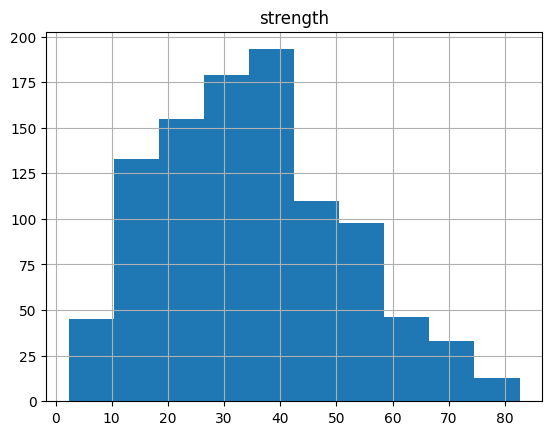

In [ ]:
df.hist('strength')
#normally distriputed, bell shape

<Axes: >

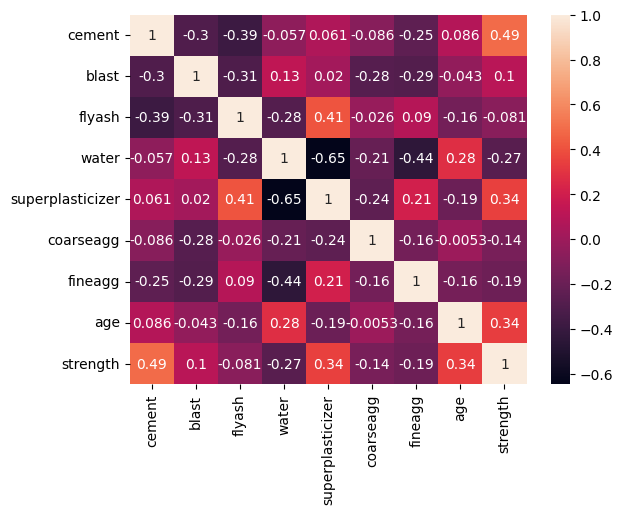

In [ ]:
sns.heatmap(df.corr(),annot=True)
#It can be spotted that flyash,blast,coarseagg, and fineagg are the least significant to strength
#The most significant factors to strength are: cement, superplasticizer, age, and water
#As mentioned in the introduction part, the most important components are cement, water, coarseagg, and fineagg but from the data given fineagg and courseagg are least signifcant
#As mentioned in the introduction part, superplasticizer wasn't from the mandatory components, but from the data given it turns out to be highly correlated to strength


<Axes: >

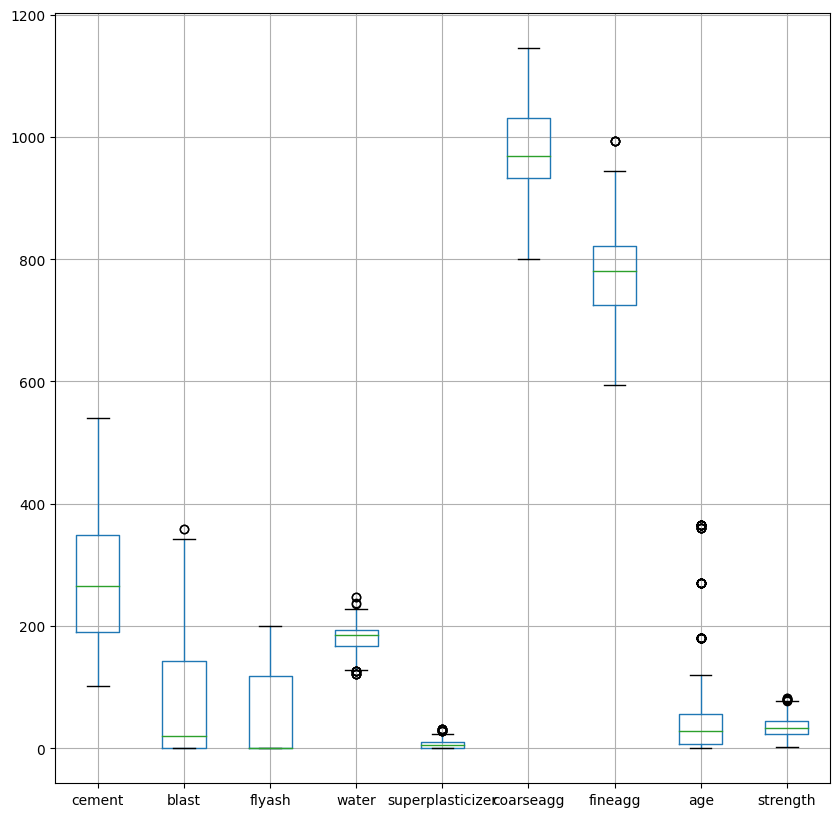

In [ ]:
df.boxplot(figsize=(10,10))
#There are some outliers exist in blast,water, superplasticizer, fineagg, and age

count    1005.000000
mean       45.856716
std        63.734692
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

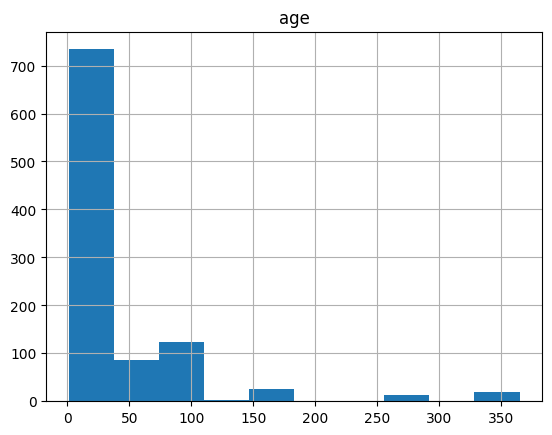

In [ ]:
# @title Age Check
df.hist('age')
df['age'].describe().T

In [ ]:
df[df['age']>120].describe().T

,count,mean,std,min,25%,50%,75%,max
cement,59.0,332.032203,99.438582,139.600000,266.000000,331.000000,380.000000,540.000000
blast,59.0,59.408475,77.398749,0.000000,0.000000,0.000000,114.000000,237.500000
flyash,59.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
water,59.0,210.796610,18.285834,173.000000,192.000000,228.000000,228.000000,228.000000
superplasticizer,59.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
coarseagg,59.0,972.081356,60.356345,932.000000,932.000000,932.000000,974.000000,1125.000000
fineagg,59.0,705.945763,103.075963,594.000000,603.500000,670.000000,809.450000,885.000000
age,59.0,262.033898,81.134832,180.000000,180.000000,270.000000,360.000000,365.000000
strength,59.0,44.161417,10.606082,24.104081,38.261092,42.126984,51.928574,74.166933


count    1005.000000
mean      182.074378
std        21.340740
min       121.750000
25%       166.610000
50%       185.700000
75%       192.940000
max       247.000000
Name: water, dtype: float64

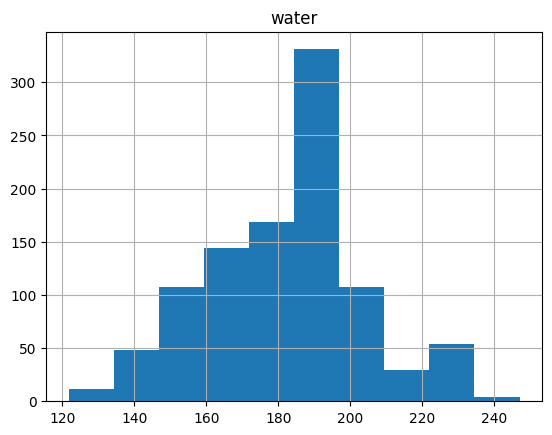

In [ ]:
# @title Water Check
df.hist('water')
df['water'].describe().T

count    1005.000000
mean      278.629055
std       104.345003
min       102.000000
25%       190.680000
50%       265.000000
75%       349.000000
max       540.000000
Name: cement, dtype: float64

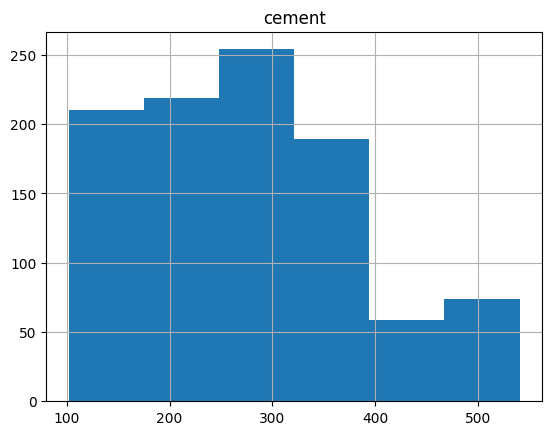

In [ ]:
# @title Cement Check
df.hist('cement',bins=6)
df['cement'].describe().T

In [ ]:
df[(df['cement'] >400)].describe().T

,count,mean,std,min,25%,50%,75%,max
cement,126.0,472.465873,40.742511,401.800000,439.000000,475.00000,500.00000,540.000000
blast,126.0,36.956349,50.201435,0.000000,0.000000,22.00000,47.50000,177.000000
flyash,126.0,25.912698,46.499380,0.000000,0.000000,0.00000,44.25000,132.000000
water,126.0,177.531746,25.866376,137.800000,162.000000,174.00000,194.25000,228.000000
superplasticizer,126.0,7.746587,8.718440,0.000000,0.000000,6.03000,11.55750,32.200000
coarseagg,126.0,952.535714,104.572705,801.000000,852.100000,936.00000,1030.00000,1125.000000
fineagg,126.0,720.423810,95.248595,594.000000,613.000000,712.00000,801.50000,896.000000
age,126.0,51.444444,72.394868,1.000000,7.000000,28.00000,56.00000,365.000000
strength,126.0,51.529976,14.668202,12.638095,40.488739,53.00002,62.02009,79.986111


count    1005.000000
mean       72.043134
std        86.170555
min         0.000000
25%         0.000000
50%        20.000000
75%       142.500000
max       359.400000
Name: blast, dtype: float64

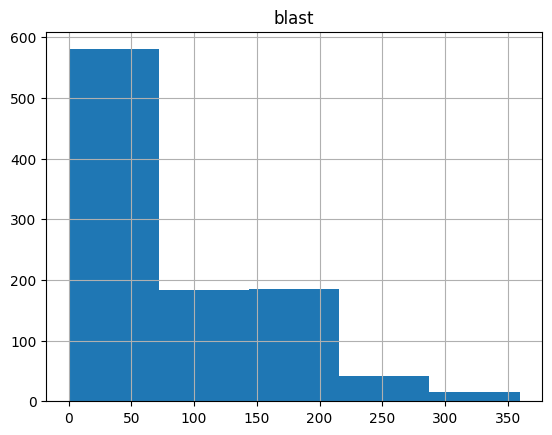

In [ ]:
# @title Blast Check
df.hist('blast',bins=5)
df['blast'].describe().T

In [ ]:
df[df['blast']>290].describe().T

,count,mean,std,min,25%,50%,75%,max
cement,12.0,213.133333,16.506160,193.500000,203.50000,207.100000,228.000000,239.600000
blast,12.0,319.733333,24.774523,290.200000,305.30000,310.700000,342.100000,359.400000
flyash,12.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
water,12.0,191.633333,8.764114,185.700000,185.70000,185.700000,203.500000,203.500000
superplasticizer,12.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
coarseagg,12.0,966.566667,18.433336,941.600000,955.80000,963.400000,977.000000,998.200000
fineagg,12.0,665.366667,29.142762,630.000000,630.00000,669.300000,689.300000,704.300000
age,12.0,22.333333,23.910185,3.000000,7.00000,17.500000,28.000000,90.000000
strength,12.0,29.881947,12.466778,9.561653,21.24965,29.024526,39.501287,51.863764


In [ ]:
# @title Scaling data
x = df.drop('strength',axis=1)
y = df['strength']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,shuffle=True)

In [ ]:
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.fit_transform(x_test)
# x_train_scaled = pd.DataFrame(x_train_scaled,columns=std.get_feature_names_out())
# x_test_scaled =  pd.DataFrame(x_test_scaled,columns=std.get_feature_names_out())


In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
train_preds = lr.predict(x_train_scaled)
test_preds = lr.predict(x_test_scaled)
print(r2_score(y_train,train_preds))
print(r2_score(y_test,test_preds))

0.5979700407224187
0.6100637368302768


In [ ]:
poly = PolynomialFeatures(degree=2)
x_train_scaled_poly = poly.fit_transform(x_train_scaled)
x_test_scaled_poly = poly.transform(x_test_scaled)

lr = LinearRegression()
lr.fit(x_train_scaled_poly,y_train)
train_preds = lr.predict(x_train_scaled_poly)
test_preds = lr.predict(x_test_scaled_poly)
print(r2_score(y_train,train_preds))
print(r2_score(y_test,test_preds))

0.8019469041107216
0.7881828735103281


In [ ]:
poly = PolynomialFeatures(degree=3)
x_train_scaled_poly = poly.fit_transform(x_train_scaled)
x_test_scaled_poly = poly.transform(x_test_scaled)

lr = LinearRegression()
lr.fit(x_train_scaled_poly,y_train)
train_preds = lr.predict(x_train_scaled_poly)
test_preds = lr.predict(x_test_scaled_poly)
print(r2_score(y_train,train_preds))
print(r2_score(y_test,test_preds))
#overfitting

0.9276557195941489
0.7315624430819376


In [ ]:
poly = PolynomialFeatures(degree=4)
x_train_scaled_poly = poly.fit_transform(x_train_scaled)
x_test_scaled_poly = poly.transform(x_test_scaled)

lr = Lasso(alpha=0.1)
lr.fit(x_train_scaled_poly,y_train)
train_preds = lr.predict(x_train_scaled_poly)
test_preds = lr.predict(x_test_scaled_poly)
print(r2_score(y_train,train_preds))
print(r2_score(y_test,test_preds))

0.9110739667202752
0.8565040571418235


In [ ]:
# Create a pipeline with PolynomialFeatures and various regressors
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())

# Define the parameter grid for PolynomialFeatures degree and regressors
param_grid = {
    'polynomialfeatures__degree': np.arange(1, 6)
}

gs = GridSearchCV(pipeline,param_grid)
gs.fit(x_train_scaled,y_train)
test_preds = gs.predict(x_test_scaled)
print(r2_score(y_test,test_preds))

# Get the best degree and best Polynomial regression model
best_poly_degree = gs.best_params_['polynomialfeatures__degree']
best_poly_model = gs.best_estimator_

# Create a Lasso regression pipeline
lasso_pipeline = make_pipeline(PolynomialFeatures(degree=best_poly_degree), Lasso())
# Define the parameter grid for Lasso regression
lasso_param_grid = {
    'lasso__alpha': [0.01, 0.1, 1.0],
    'polynomialfeatures__degree': np.arange(1, 6)
}
# Create a GridSearchCV object for Lasso regression
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid)
lasso_grid_search.fit(x_train_scaled, y_train)
test_preds = lasso_grid_search.predict(x_test_scaled)
print(r2_score(y_test,test_preds))

# Create a ridge regression pipeline
ridge_pipeline = make_pipeline(PolynomialFeatures(degree=best_poly_degree), Ridge())
# Define the parameter grid for Lasso regression
ridge_param_grid = {
    'ridge__alpha': [0.01, 0.1, 1.0],
    'polynomialfeatures__degree': np.arange(1, 6)
}
# Create a GridSearchCV object for Lasso regression
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid)
ridge_grid_search.fit(x_train_scaled, y_train)
test_preds = ridge_grid_search.predict(x_test_scaled)
print(r2_score(y_test,test_preds))


0.7315624430819376
0.8565040571418235
0.8256762367503179


In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003724,0.000495,0.001303,0.000189,1,{'polynomialfeatures__degree': 1},5.564096e-01,6.411483e-01,6.163578e-01,5.208151e-01,5.597471e-01,5.788956e-01,4.364505e-02,3
1,0.013394,0.002279,0.003325,0.002140,2,{'polynomialfeatures__degree': 2},7.614954e-01,8.068474e-01,7.701929e-01,7.013967e-01,7.235265e-01,7.526918e-01,3.687392e-02,2
2,0.048307,0.015911,0.002700,0.000914,3,{'polynomialfeatures__degree': 3},7.276510e-01,8.300404e-01,8.212917e-01,6.312564e-01,8.400345e-01,7.700548e-01,8.022932e-02,1
3,0.217249,0.016023,0.003852,0.002095,4,{'polynomialfeatures__degree': 4},-2.932418e+07,-1.189491e+07,-1.063118e+06,-2.378907e+17,-1.521101e+07,-4.757814e+16,9.515629e+16,5
4,0.497574,0.177627,0.006569,0.002133,5,{'polynomialfeatures__degree': 5},-3.776080e+06,-9.927397e+05,-1.297959e+08,-7.842802e+06,-1.965943e+06,-2.887469e+07,5.051504e+07,4


In [ ]:
pd.DataFrame(lasso_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso__alpha,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007526,0.003255,0.005109,0.003238,0.01,1,"{'lasso__alpha': 0.01, 'polynomialfeatures__de...",0.557658,0.640720,0.615836,0.522529,0.559960,0.579341,0.042831,8
1,0.089978,0.043437,0.002476,0.001725,0.01,2,"{'lasso__alpha': 0.01, 'polynomialfeatures__de...",0.756861,0.811464,0.768007,0.708894,0.720468,0.753139,0.036501,3
2,0.215759,0.033381,0.009997,0.002784,0.01,3,"{'lasso__alpha': 0.01, 'polynomialfeatures__de...",0.837276,0.831553,0.842325,0.708801,0.830244,0.810040,0.050803,2
3,0.013001,0.003094,0.005448,0.002821,0.1,1,"{'lasso__alpha': 0.1, 'polynomialfeatures__deg...",0.562391,0.640054,0.610729,0.529957,0.560074,0.580641,0.039396,7
4,0.015565,0.003080,0.002896,0.001735,0.1,2,"{'lasso__alpha': 0.1, 'polynomialfeatures__deg...",0.762849,0.814651,0.767121,0.706883,0.712240,0.752749,0.039712,4
5,0.237505,0.072749,0.011877,0.005354,0.1,3,"{'lasso__alpha': 0.1, 'polynomialfeatures__deg...",0.857605,0.879693,0.842371,0.739502,0.800719,0.823978,0.049498,1
6,0.014771,0.002083,0.004894,0.003046,1.0,1,"{'lasso__alpha': 1.0, 'polynomialfeatures__deg...",0.541177,0.586636,0.536098,0.507162,0.512448,0.536704,0.028194,9
7,0.012764,0.002467,0.001524,0.000226,1.0,2,"{'lasso__alpha': 1.0, 'polynomialfeatures__deg...",0.708913,0.727340,0.676794,0.644643,0.655666,0.682671,0.031285,5
8,0.058683,0.023797,0.006779,0.002590,1.0,3,"{'lasso__alpha': 1.0, 'polynomialfeatures__deg...",0.703315,0.749421,0.663649,0.654954,0.603362,0.674940,0.048996,6


In [ ]:
pd.DataFrame(ridge_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022386,0.004061,0.011566,0.005781,1,0.01,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.556424,0.641143,0.616345,0.520835,0.559749,0.578899,0.043634,9
1,0.012174,0.007450,0.003489,0.003724,1,0.1,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.556553,0.641097,0.616227,0.521014,0.559762,0.578930,0.043539,8
2,0.010671,0.004074,0.003497,0.004789,1,1.0,"{'polynomialfeatures__degree': 1, 'ridge__alph...",0.557737,0.640639,0.615076,0.522671,0.559856,0.579196,0.042643,7
3,0.023901,0.006534,0.006433,0.004926,2,0.01,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.761405,0.806936,0.770164,0.701505,0.723587,0.752719,0.036853,6
4,0.010014,0.003779,0.002730,0.002438,2,0.1,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.760732,0.807613,0.769920,0.702321,0.723885,0.752894,0.036728,5
5,0.009635,0.001484,0.001462,0.000222,2,1.0,"{'polynomialfeatures__degree': 2, 'ridge__alph...",0.758567,0.810589,0.768177,0.706277,0.722461,0.753214,0.036588,4
6,0.016925,0.007768,0.007501,0.003004,3,0.01,"{'polynomialfeatures__degree': 3, 'ridge__alph...",0.747025,0.829814,0.822436,0.674086,0.839908,0.782654,0.063468,3
7,0.025358,0.002565,0.005310,0.001870,3,0.1,"{'polynomialfeatures__degree': 3, 'ridge__alph...",0.769850,0.830947,0.821304,0.720126,0.838381,0.796122,0.044941,2
8,0.021991,0.005324,0.006938,0.002983,3,1.0,"{'polynomialfeatures__degree': 3, 'ridge__alph...",0.820263,0.831565,0.832499,0.717555,0.827701,0.805917,0.044391,1


In [ ]:
# Get the best degree and best model
linear_best_degree = gs.best_score_
linear_best_model = gs.best_estimator_
linear_best_params = gs.best_params_

lasso_best_degree = lasso_grid_search.best_score_
lasso_best_model = lasso_grid_search.best_estimator_
lasso_best_params = lasso_grid_search.best_params_

ridge_best_degree = ridge_grid_search.best_score_
ridge_best_model = ridge_grid_search.best_estimator_
ridge_best_params = ridge_grid_search.best_params_

# Print the best degree and best model
print(f"Linear Best score: {linear_best_degree}")
print(f"Linear Best Model: {linear_best_model}")
print(f"Linear Best Params: {linear_best_params}")

print(f"Lasso Best score: {lasso_best_degree}")
print(f"Lasso Best Model: {lasso_best_model}")
print(f"Lasso Best Params: {lasso_best_params}")

print(f"Ridge Best score: {ridge_best_degree}")
print(f"Ridge Best Model: {ridge_best_model}")
print(f"Ridge Best Params: {ridge_best_params}")

Linear Best score: 0.7700547834305643
Linear Best Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])
Linear Best Params: {'polynomialfeatures__degree': 3}
Lasso Best score: 0.824750485323704
Lasso Best Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('lasso', Lasso(alpha=0.1))])
Lasso Best Params: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4}
Ridge Best score: 0.8059167912759146
Ridge Best Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])
Ridge Best Params: {'polynomialfeatures__degree': 3, 'ridge__alpha': 1.0}


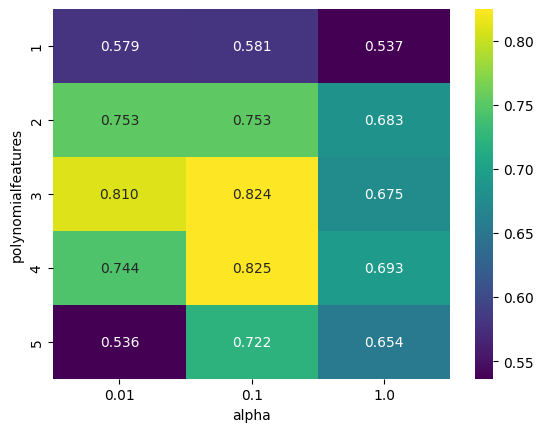

In [ ]:
# Assuming grid_search_results is your GridSearchCV object
results = lasso_grid_search.cv_results_
params = results['params']
scores = results['mean_test_score']

# Extract hyperparameters and scores
hyperparam1 = [param['polynomialfeatures__degree'] for param in params]
hyperparam2 = [param['lasso__alpha'] for param in params]

# Create a DataFrame
df = pd.DataFrame({'polynomialfeatures': hyperparam1, 'alpha': hyperparam2, 'MeanTestScore': scores})

# Pivot the DataFrame for the heatmap
pivot_df = df.pivot(index='polynomialfeatures', columns='alpha', values='MeanTestScore')

# Create a heatmap
sns.heatmap(pivot_df, annot=True, cmap='viridis', fmt=".3f")
plt.show()